# Boundary Effects
Looking for any potential problems in the open boundaries of MOM6 PanAnt simulation.

In [17]:
%matplotlib inline
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import cftime

In [2]:
db='panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client(n_workers=48)
client

Client Scheduler: tcp://127.0.0.1:44773 Dashboard: /proxy/8787/status,Cluster Workers: 48 Cores: 48 Memory: 202.48 GB


In [33]:
tos = cc.querying.getvar('panan','tos', session)

<xarray.DataArray 'tos' (time: 365, yh: 1690, xh: 7200)>
dask.array<concatenate, shape=(365, 1690, 7200), dtype=float32, chunksize=(31, 1690, 7200), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -280.0 -279.9 -279.9 -279.8 ... 79.87 79.92 79.97
  * yh       (yh) float64 -81.1 -81.08 -81.06 -81.03 ... -37.16 -37.12 -37.08
  * time     (time) object 1991-01-01 12:00:00 ... 1991-12-31 12:00:00
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

Text(0.5, 1.0, 'boundary timeseries')

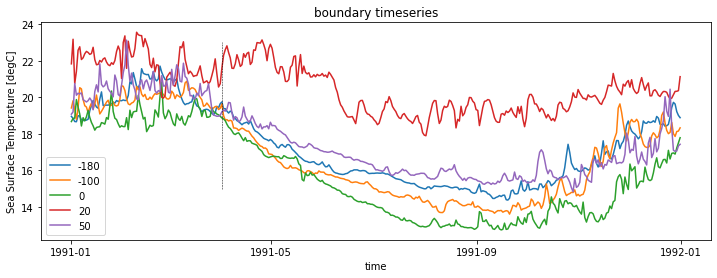

In [36]:
plt.figure(figsize=(12,4))
locs = [-180,-100, 0, 20, 50]
for i in range(5):
    tos_ts = tos.isel(yh=1689).sel(xh=locs[i],method='nearest')
    tos_ts.plot(label=locs[i])
plt.legend()
plt.plot([cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0),cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0)],[15,23],'k--',linewidth=0.5)
plt.title('boundary timeseries')

In [37]:
zos = cc.querying.getvar('panan','zos', session)

Text(0.5, 1.0, 'boundary timeseries')

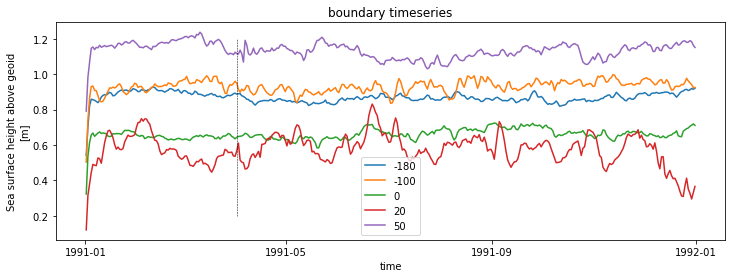

In [39]:
plt.figure(figsize=(12,4))
locs = [-180,-100, 0, 20, 50]
for i in range(5):
    zos_ts = zos.isel(yh=1689).sel(xh=locs[i],method='nearest')
    zos_ts.plot(label=locs[i])
plt.legend()
plt.plot([cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0),cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0)],[0.2,1.2],'k--',linewidth=0.5)
plt.title('boundary timeseries')

In [43]:
u_surf = cc.querying.getvar('panan','u_surf', session)

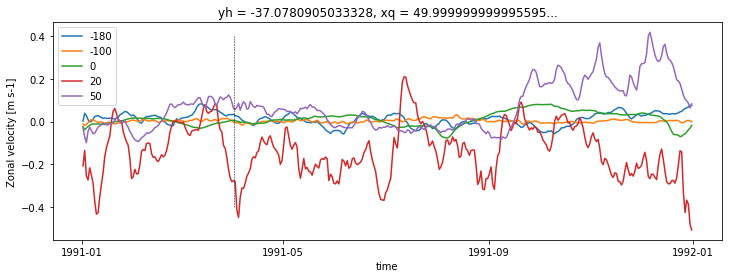

In [44]:
plt.figure(figsize=(12,4))
locs = [-180,-100, 0, 20, 50]
for i in range(5):
    u_surf_ts = u_surf.isel(yh=1689).sel(xq=locs[i],method='nearest')
    u_surf_ts.plot(label=locs[i])
plt.legend()
plt.plot([cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0),cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0)],[-0.4,0.4],'k--',linewidth=0.5)

In [45]:
v_surf = cc.querying.getvar('panan','v_surf', session)

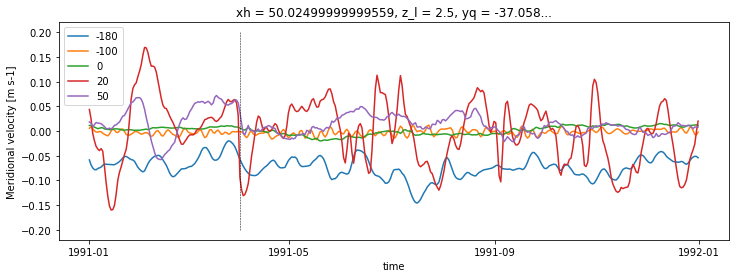

In [47]:
plt.figure(figsize=(12,4))
locs = [-180,-100, 0, 20, 50]
for i in range(5):
    v_surf_ts = v_surf.isel(yq=1690).sel(xh=locs[i],method='nearest')
    v_surf_ts.plot(label=locs[i])
plt.legend()
plt.plot([cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0),cftime.DatetimeNoLeap(1991, 4, 1, 12, 0, 0, 0)],[-0.2,0.2],'k--',linewidth=0.5)